In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r"C:\Users\User\Desktop\iXperience\Sendy Project\Train.csv")
test = pd.read_csv(r"C:\Users\User\Desktop\iXperience\Sendy Project\Test.csv")
riders = pd.read_csv(r"C:\Users\User\Desktop\iXperience\Sendy Project\Riders.csv")
submission = pd.read_csv(r"C:\Users\User\Desktop\iXperience\Sendy Project\SampleSubmission.csv")

In [4]:
train.keys()

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [32]:
#Changing Date and Time columns to Date Time Type
train['Placement - Time'] = pd.to_datetime(train['Placement - Time'])
train['Confirmation - Time'] = pd.to_datetime(train['Confirmation - Time'])
train['Pickup - Time'] = pd.to_datetime(train['Pickup - Time'])
train['Arrival at Pickup - Time'] = pd.to_datetime(train['Arrival at Pickup - Time'])
train['Arrival at Destination - Time'] = pd.to_datetime(train['Arrival at Destination - Time'])
train.dtypes

#Extracting hours and mins from time
train['Placement - Hours'] = train['Placement - Time'].dt.hour
train['Placement - Mins'] = train['Placement - Time'].dt.minute
train['Confirmation - Hours'] = train['Confirmation - Time'].dt.hour
train['Confirmation - Mins'] = train['Confirmation - Time'].dt.minute
train['Pickup - Hours'] = train['Pickup - Time'].dt.hour
train['Pickup - Mins'] = train['Pickup - Time'].dt.minute
train['Arrival at Pickup - Hours'] = train['Arrival at Pickup - Time'].dt.hour
train['Arrival at Pickup - Mins'] = train['Arrival at Pickup - Time'].dt.minute
train['Arrival at Destination - Hours'] = train['Arrival at Destination - Time'].dt.hour
train['Arrival at Destination - Mins'] = train['Arrival at Destination - Time'].dt.minute

train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'Placement - Hours', 'Placement - Mins',
       'Confirmation - Hours', 'Confirmation - Mins', 'Pickup - Hours',
       'Pickup - Mins', 'Arrival at Pickup - Hours',
       'Arrival at Pickup

In [7]:
#Preping for Modeling

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [38]:
#Creating train and test set
x = train[['Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
           'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
           'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month',
           'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
           'Arrival at Destination - Weekday (Mo = 1)','Distance (KM)']]
y = train['Arrival at Destination - Hours']

x.head()
y.head()

#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test',  x_test.shape)
print('y_test',  y_test.shape)

x_train (16960, 10)
y_train (16960,)
x_test (4241, 10)
y_test (4241,)


In [28]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model.fit(X=x_train, y=y_train)
model.intercept_
model.coef_

array([-3.58545514e-01, -1.03981410e+08, -3.37170416e+10,  3.89260184e+07,
       -3.37195048e+10,  3.25296001e+07, -3.37195048e+10,  3.25257914e+07,
        1.01156051e+11,  1.61419870e-02])

In [43]:
#Using model to predict 
predictions = model.predict(x_test)
predictions

array([13.34065135, 13.36478903, 13.31157877, ..., 13.23654463,
       13.35623863, 13.22022822])

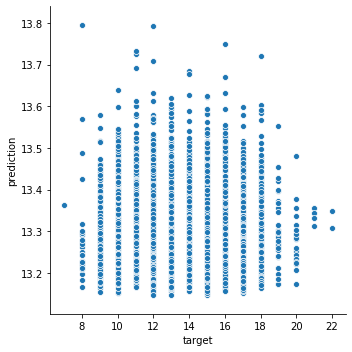

In [46]:
#comapring prediction to test
x = x_test.reset_index().copy()
x["target"] = y_test.tolist()
x["prediction"] = predictions
x.head()

sns.relplot(x="target", y="prediction", data=x, kind="scatter")